In [4]:
import os
import json

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn-v0_8')

In [5]:
for i, path in enumerate(os.walk('export')):
    if i == 0:
        continue  # skip 'export' directory, only look at sub-directories
    print(path)

('export\\banknote-authentication', [], ['gen-0.json', 'gen-1.json', 'gen-10.json', 'gen-11.json', 'gen-12.json', 'gen-13.json', 'gen-14.json', 'gen-15.json', 'gen-16.json', 'gen-17.json', 'gen-18.json', 'gen-19.json', 'gen-2.json', 'gen-20.json', 'gen-21.json', 'gen-22.json', 'gen-23.json', 'gen-3.json', 'gen-4.json', 'gen-5.json', 'gen-6.json', 'gen-7.json', 'gen-8.json', 'gen-9.json', 'pareto.json'])
('export\\blood-transfusion-service-center', [], ['gen-0.json', 'gen-1.json', 'gen-10.json', 'gen-11.json', 'gen-12.json', 'gen-13.json', 'gen-14.json', 'gen-15.json', 'gen-16.json', 'gen-17.json', 'gen-18.json', 'gen-19.json', 'gen-2.json', 'gen-20.json', 'gen-21.json', 'gen-22.json', 'gen-23.json', 'gen-24.json', 'gen-25.json', 'gen-26.json', 'gen-27.json', 'gen-28.json', 'gen-29.json', 'gen-3.json', 'gen-30.json', 'gen-31.json', 'gen-32.json', 'gen-33.json', 'gen-34.json', 'gen-35.json', 'gen-36.json', 'gen-37.json', 'gen-38.json', 'gen-39.json', 'gen-4.json', 'gen-40.json', 'gen-41.

[[0.13140161707997322, [0.2155362351073159, 0.22651534444755977, 0.2446233613623513, 0.2242166151603063, 0.2218287852075365, 0.24510597354835933, 0.22022438214884865, 0.22235440545611912, 0.23355292446083492, 0.22021085023880005, 0.2218514101372825, 0.21627947688102722, 0.21480314764711592, 0.23476040032174852, 0.21725775135887992, 0.2239790740940306, 0.22287295262018839, 0.21331052813265058, 0.22103491094377306, 0.2163146800465054, 0.21183790763219199, 0.2146780424647861, 0.2168134699265162, 0.2097588131825129, 0.20914740529325274, 0.19939530392487845, 0.2044535991218355, 0.20405353440178764, 0.2106290641758177, 0.20433373914824593, 0.20827526350816092, 0.2013422581884596, 0.2014028968082534, 0.2055927018324534, 0.19997002598312166, 0.20035086903307173, 0.2082283165719774, 0.20154089563422733, 0.20093072950839996, 0.1976208852397071, 0.19894814987977347, 0.2038718130853441, 0.20021220379405552, 0.20083831747372946, 0.1937263020210796, 0.1993892722659641, 0.1953241303563118, 0.19595159

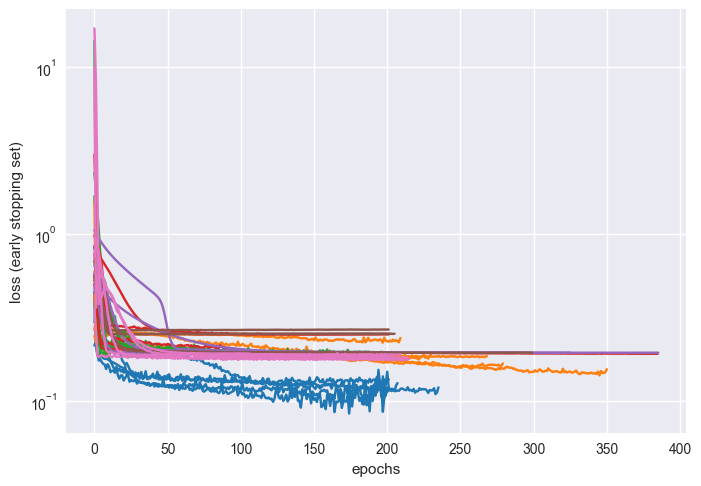

In [6]:
with open(os.path.join(path[0], 'pareto.json')) as f_pareto:
    pareto = json.load(f_pareto)

fig1, ax1 = plt.subplots()

colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
for i, individual in enumerate(pareto['set']):
    losses = individual['metrics']['performance']['loss']
    print(losses)

    for fold, loss_tuple in enumerate(losses):
        x = range(len(loss_tuple[1]))
        y = loss_tuple[1]

        ax1.plot(x, y, color=colours[i], label=f'Individual {i+1}')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss (early stopping set)')
ax1.set_yscale('log')
#ax1.legend()